In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#1）忽略警告的用法
#import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline
#2）内嵌绘图忽略plt.show()--------%matplotlib inline
#3)数据清洗三大块：缺失值，异常值，分类变量



In [2]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
df_train = pd.read_csv('C:/Users/Administrator/Desktop/picked_cal2.csv')
df_train.columns
#df_train=df_train[df_train['STATA']=='S1K3']

Index(['Well', 'Depth', 'Pore', 'GR', 'SP', 'CAL', 'K', 'TH', 'U', 'DEN', 'AC',
       'CN', 'PERM', 'STA', 'Lithcore', 'Lithdebris', 'Faces'],
      dtype='object')

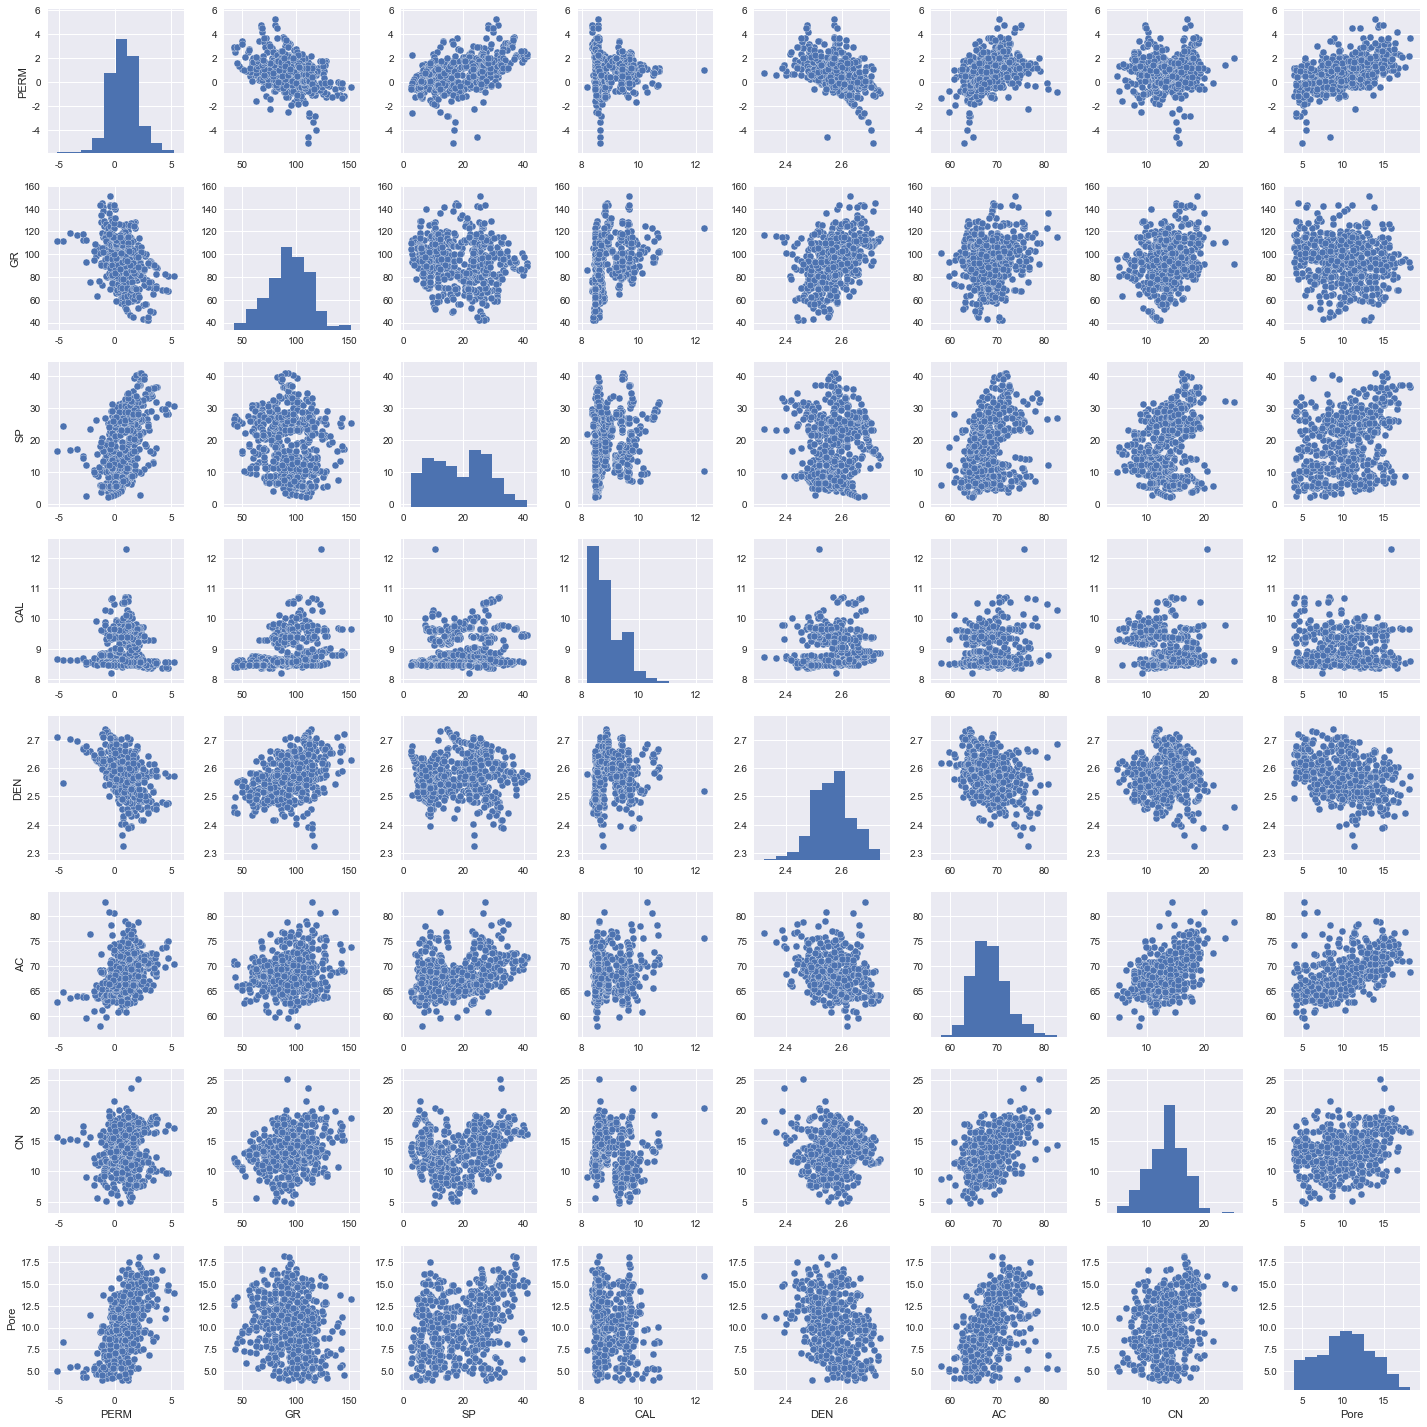

In [4]:
df_train['PERM']=np.log(df_train['PERM'])
sns.set()
#cols = ['PORE','U','DEN', 'AC', 'CN']
cols = [ 'PERM', 'GR', 'SP', 'CAL', 'DEN', 'AC',
       'CN', 'Pore']
sns.pairplot(df_train[cols], size = 2.5)
#8）sns，pairplot

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 17 columns):
Well          556 non-null object
Depth         556 non-null float64
Pore          556 non-null float64
GR            556 non-null float64
SP            556 non-null float64
CAL           556 non-null float64
K             430 non-null float64
TH            430 non-null float64
U             430 non-null float64
DEN           556 non-null float64
AC            556 non-null float64
CN            556 non-null float64
PERM          556 non-null float64
STA           556 non-null object
Lithcore      397 non-null float64
Lithdebris    554 non-null float64
Faces         289 non-null float64
dtypes: float64(15), object(2)
memory usage: 73.9+ KB


In [6]:
df_train=df_train.dropna(subset=['U','Lithcore','Faces'])
df_train=df_train[df_train['CAL']<11]
dummies_Lithcore=pd.get_dummies(df_train['Lithcore'],prefix='Lithcore')
dummies_Lithdebris=pd.get_dummies(df_train['Lithdebris'],prefix='Lithdebris')
dummies_Faces=pd.get_dummies(df_train['Faces'],prefix='Faces')

In [7]:
df_train=pd.concat([df_train,dummies_Faces
 ],axis=1)

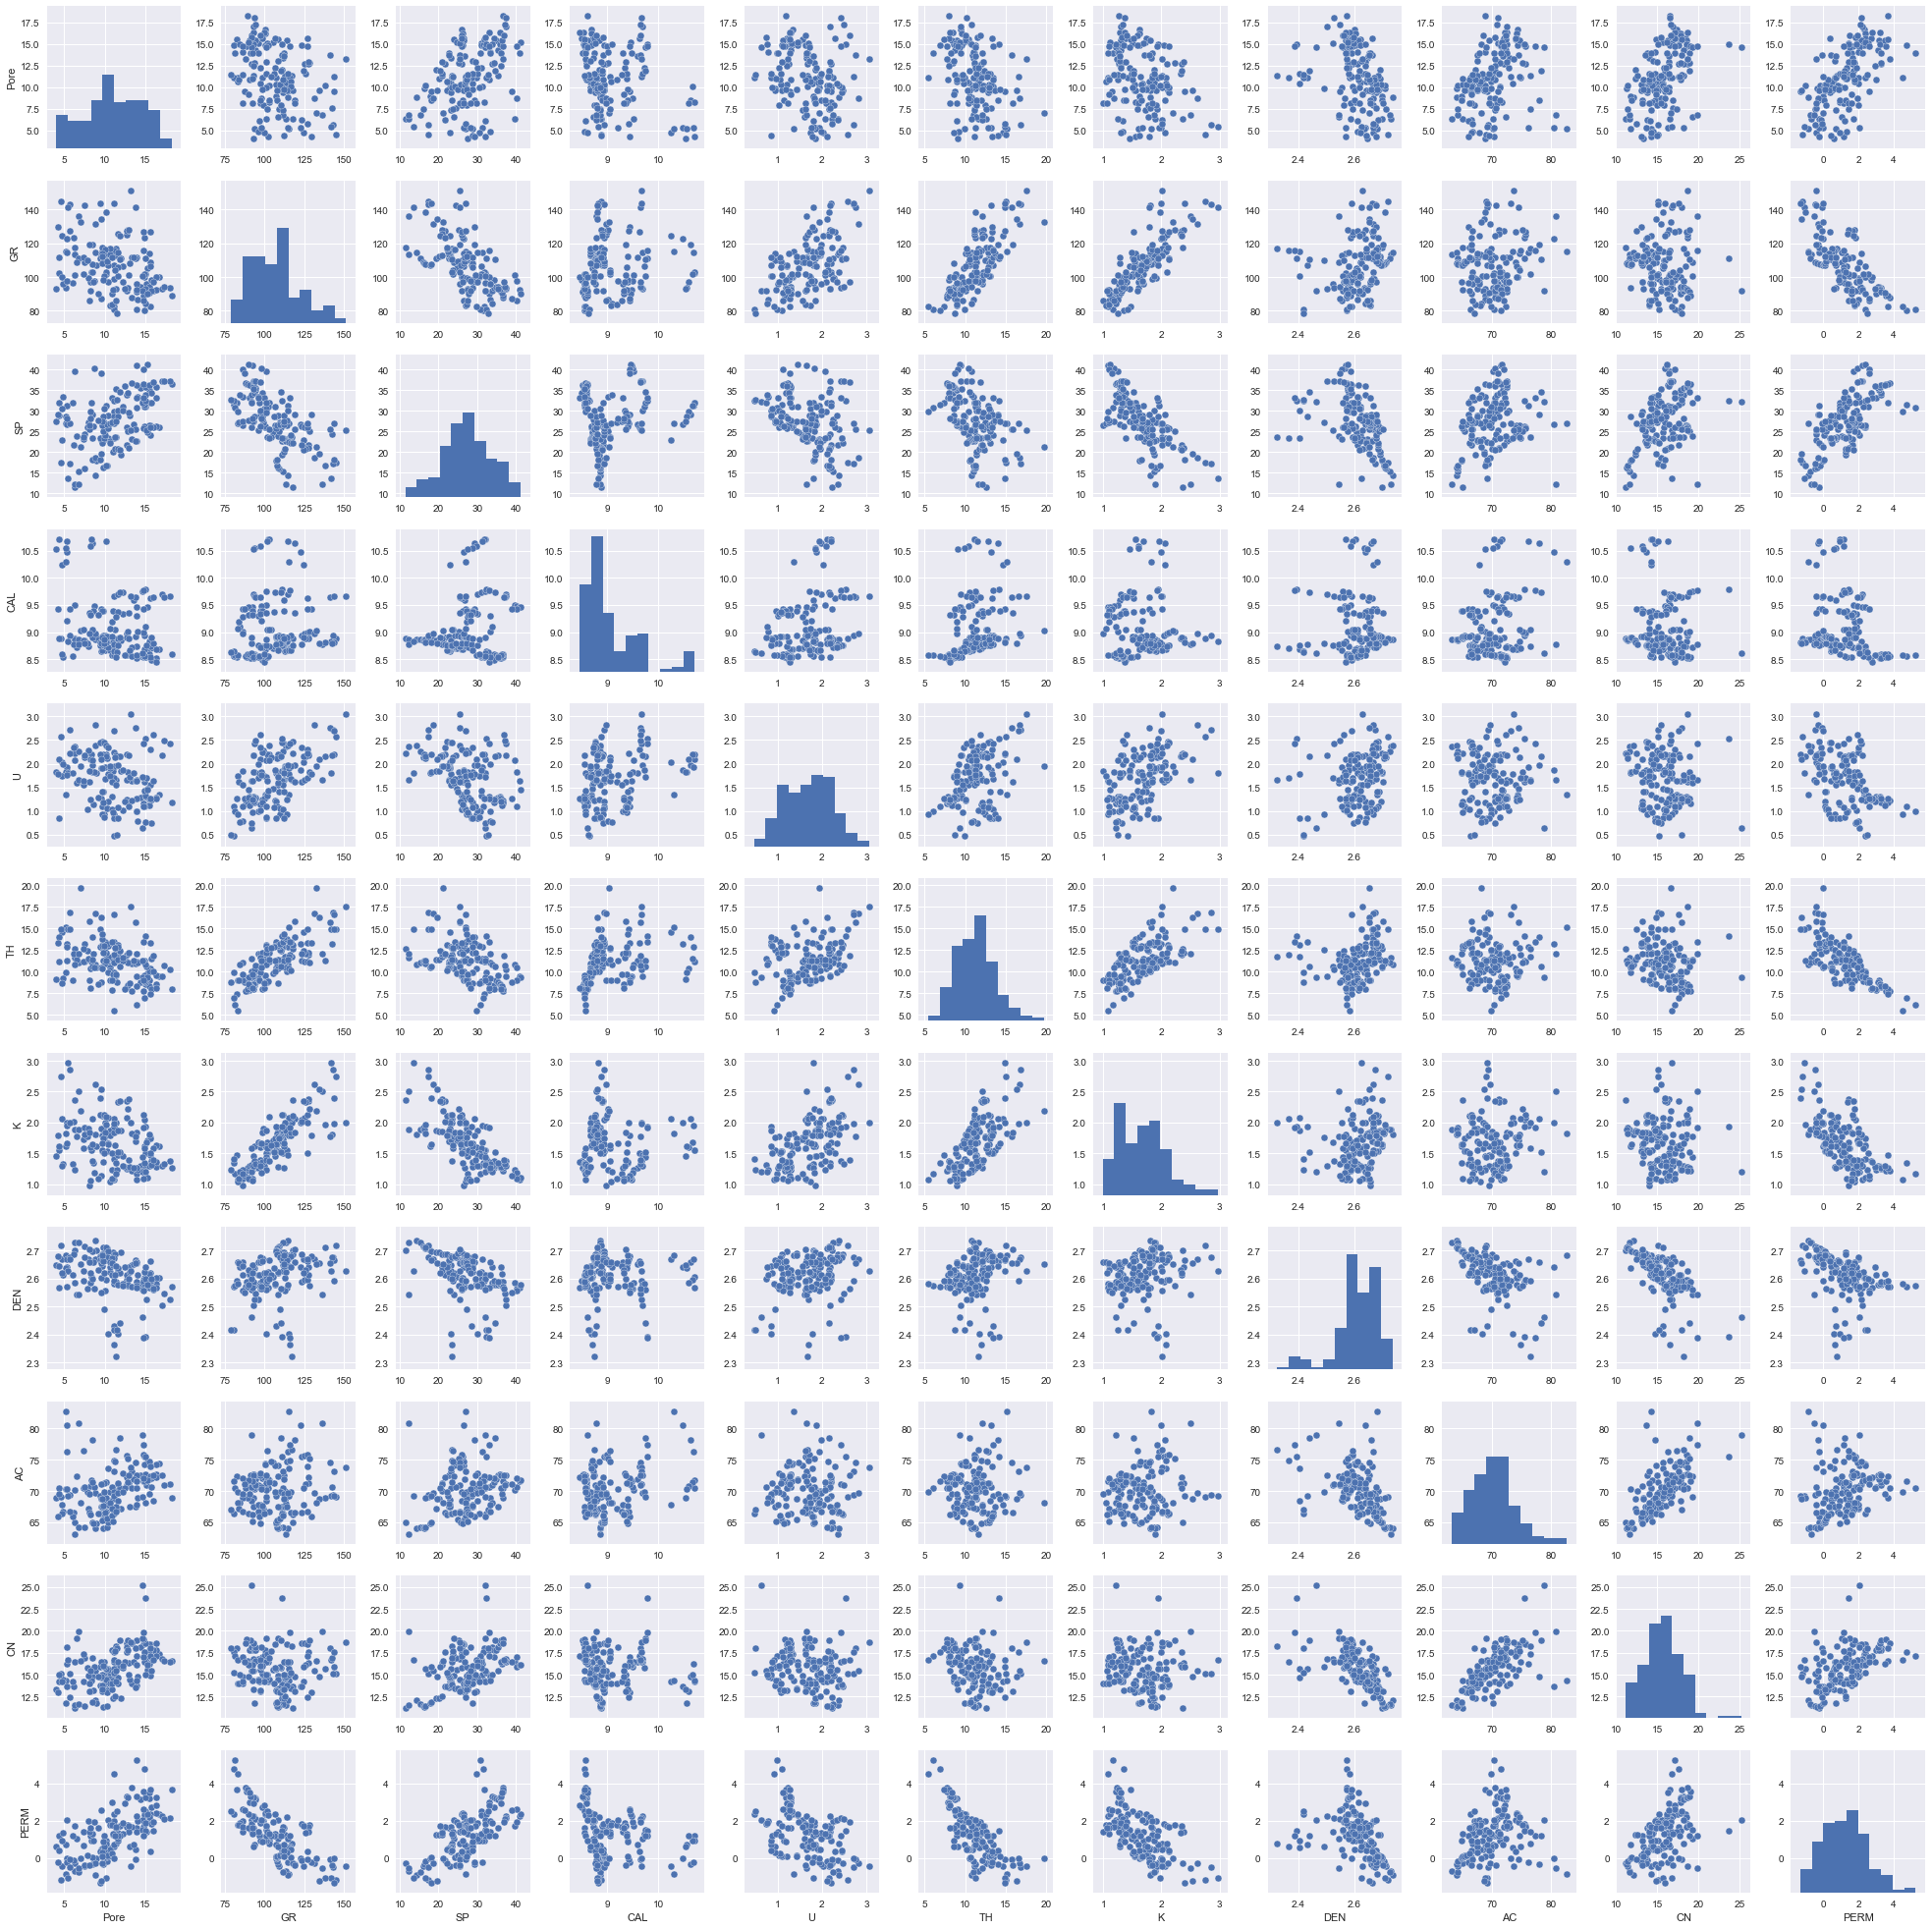

In [8]:
sns.set()
cols = [ 'Pore', 'GR', 'SP', 'CAL','U', 'TH','K','DEN', 'AC',
       'CN', 'PERM']
sns.pairplot(df_train[cols], size = 2.5)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 382 to 549
Data columns (total 20 columns):
Well          158 non-null object
Depth         158 non-null float64
Pore          158 non-null float64
GR            158 non-null float64
SP            158 non-null float64
CAL           158 non-null float64
K             158 non-null float64
TH            158 non-null float64
U             158 non-null float64
DEN           158 non-null float64
AC            158 non-null float64
CN            158 non-null float64
PERM          158 non-null float64
STA           158 non-null object
Lithcore      158 non-null float64
Lithdebris    158 non-null float64
Faces         158 non-null float64
Faces_1.0     158 non-null uint8
Faces_2.0     158 non-null uint8
Faces_3.0     158 non-null uint8
dtypes: float64(15), object(2), uint8(3)
memory usage: 27.7+ KB


In [10]:

df_train

,Well,Depth,Pore,GR,SP,CAL,K,TH,U,DEN,AC,CN,PERM,STA,Lithcore,Lithdebris,Faces,Faces_1.0,Faces_2.0,Faces_3.0
382,TZ122,4196.800,4.720,124.370,22.932,10.233,2.061,14.598,2.032,2.670,67.803,14.268,-0.446287,S1K1,5.0,5.0,2.0,0,1,0
383,TZ122,4197.710,5.190,114.920,27.030,10.292,1.827,15.106,1.354,2.684,82.729,14.303,-0.855666,S1K1,5.0,5.0,2.0,0,1,0
384,TZ122,4198.680,5.300,122.763,26.622,10.465,1.997,13.236,1.868,2.641,80.535,13.706,-0.032523,S1K1,5.0,5.0,2.0,0,1,0
385,TZ122,4199.310,8.480,118.900,29.228,10.630,2.059,14.002,1.976,2.660,78.110,14.781,-0.317454,S1K1,1.0,5.0,2.0,0,1,0
386,TZ122,4199.580,5.290,114.805,31.357,10.673,1.954,12.813,1.934,2.668,76.256,16.228,-0.231932,S1K1,5.0,5.0,2.0,0,1,0
387,TZ122,4200.050,4.290,102.213,31.977,10.701,1.553,11.155,2.103,2.569,70.435,14.193,1.169381,S1K1,5.0,2.0,2.0,0,1,0
388,TZ122,4200.360,8.310,102.807,31.896,10.708,1.550,11.170,2.200,2.605,71.768,14.364,0.947789,S1K1,2.0,2.0,2.0,0,1,0
389,TZ122,4200.570,10.120,101.743,31.339,10.668,1.687,11.528,2.207,2.596,71.415,15.048,0.945461,S1K1,2.0,2.0,2.0,0,1,0
390,TZ122,4200.860,8.180,97.074,29.884,10.588,1.609,10.402,2.085,2.587,70.845,13.159,1.174338,S1K1,5.0,2.0,2.0,0,1,0
391,TZ122,4201.100,5.240,93.526,28.752,10.548,1.610,9.898,1.835,2.637,70.276,11.793,0.729961,S1K1,5.0,2.0,2.0,0,1,0


Text(0.5,1,'测井响应相关性热度图')

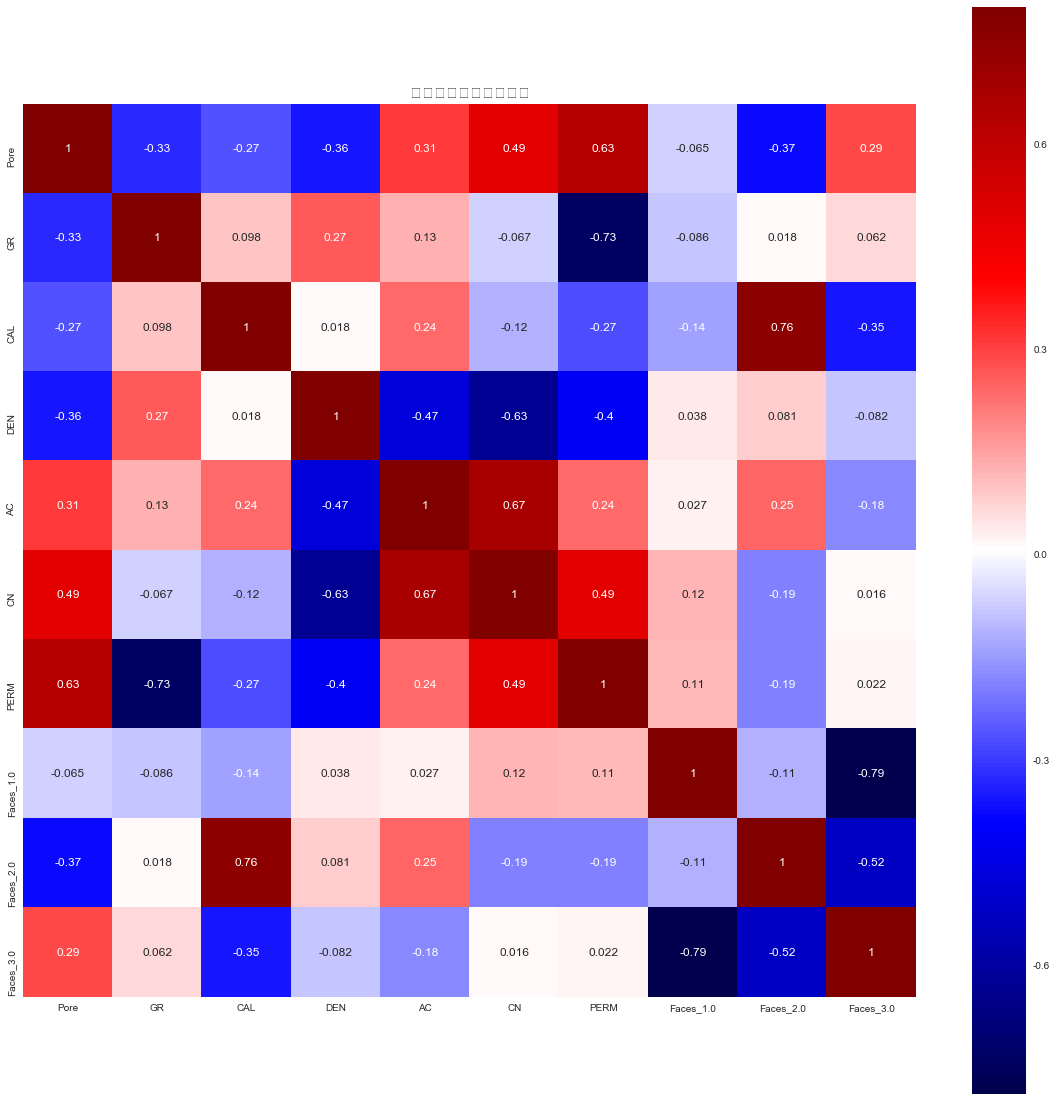

In [11]:
df_trainn=df_train.drop(['Lithcore','Lithdebris','Depth','SP','Faces','U','TH','K'],axis=1)
corrmat = df_trainn.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True,cmap='seismic');
#6）sns.heatmap绘制相关性热度图，
plt.title(u"测井响应相关性热度图",fontsize=16)

In [24]:
#A=df_train[[ 'U','DEN', 'AC', 'CN']]
#A=df_train[[ 'GR','CAL','U', 'TH','K','DEN', 'AC', 'CN']]
A=df_train.drop(['PERM','STA','Well','Lithcore','Lithdebris','Depth','SP','Faces','U','TH','K','CAL'],axis=1)
B=df_train[['PERM']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(A)
scaler2 = StandardScaler().fit(B)


In [25]:
print(scaler.mean_,scaler.var_)

print(scaler2.mean_,scaler2.var_)

[  1.10398671e+01   1.06819361e+02   2.61096835e+00   7.02773481e+01
   1.56913608e+01   1.45569620e-01   6.96202532e-02   7.84810127e-01] [  1.20644779e+01   2.39526465e+02   5.72310659e-03   1.32505267e+01
   5.13851231e+00   1.24379106e-01   6.47732735e-02   1.68883192e-01]
[ 1.22802669] [ 1.61927704]


In [26]:
AA=scaler.transform(A)
BB=scaler2.transform(B)

In [27]:

#df_cal['PORE']=scale(df_cal['PORE'])

#df_cal['DEN']=scale(df_cal['DEN'])
#df_cal['AC']=scale(df_cal['AC'])
#df_cal['CN']=scale(df_cal['CN'])

In [28]:
#df_cal['PORE']

In [29]:
#df_cal

#df_cal=df_cal[df_cal['K'].isnull().values==False]


In [30]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
X=AA
y=BB
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=13)

the r2_score is 0.839836141907 	mean_absolute_error is 0.299012856707 	 the mean_squared_error is 0.15225555144


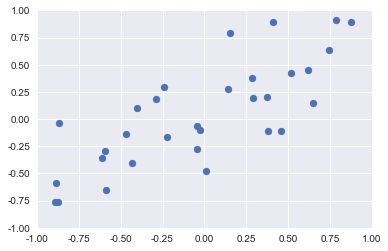

0.850526571243


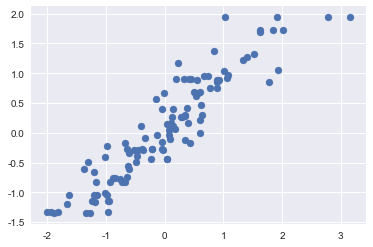

In [31]:
clf_KNN=KNeighborsRegressor()
clf_KNN.fit(X_train,y_train)
predicts_knn=clf_KNN.predict(X_test)
predicts_knnn=clf_KNN.predict(X_train)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
cross_val_score(clf_KNN,X,y,cv=5,scoring='r2')
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_knn),mean_absolute_error(y_test,predicts_knn),mean_squared_error(y_test,predicts_knn)))
plt.scatter(y_test,predicts_knn)
axis([-1,1,-1,1])
plt.show()
print(r2_score(y_train,predicts_knnn))

plt.scatter(y_train,predicts_knnn)
plt.show()


the r2_score is 0.807469985241 	mean_absolute_error is 0.354595523497 	 the mean_squared_error is 0.183023585438


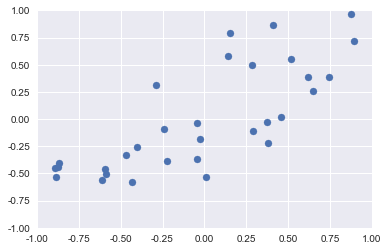

0.775400791249


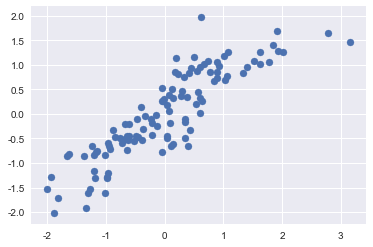

In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
cross_val_score(lr,X,y,cv=5)
lr.fit(X_train,y_train)
predicts_lr=lr.predict(X_test)
predicts_lrr=lr.predict(X_train)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_lr),mean_absolute_error(y_test,predicts_lr),mean_squared_error(y_test,predicts_lr)))
plt.scatter(y_test,predicts_lr)

axis([-1,1,-1,1])
plt.show()
print(r2_score(y_train,predicts_lrr))
plt.scatter(y_train,predicts_lrr)
plt.show()


[ 0.59243439  0.1775228   0.44165459  0.12690793  0.81858916]
the r2_score is 0.871984146199 	mean_absolute_error is 0.267937253543 	 the mean_squared_error is 0.121694898247


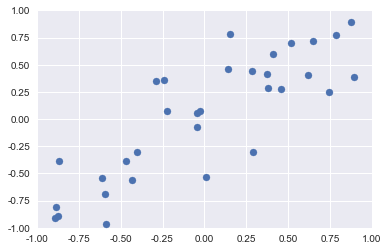

0.980855769857


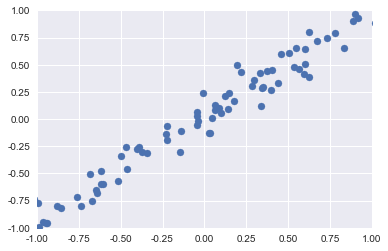

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
rfr=RandomForestRegressor(n_estimators=1500)
print(cross_val_score(rfr,X,y,cv=5))
rfr.fit(X_train,y_train)
predicts_rfr=rfr.predict(X_test)
predicts_rfrr=rfr.predict(X_train)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_rfr),mean_absolute_error(y_test,predicts_rfr),mean_squared_error(y_test,predicts_rfr)))
plt.scatter(y_test,predicts_rfr)
axis([-1,1,-1,1])
plt.show()
print(r2_score(y_train,predicts_rfrr))
plt.scatter(y_train,predicts_rfrr)
axis([-1,1,-1,1])
plt.show()

[ 0.57826088  0.01110934  0.37405098  0.34442221  0.13115338]
the r2_score is 0.834704489995 	mean_absolute_error is 0.336973277733 	 the mean_squared_error is 0.157133821112


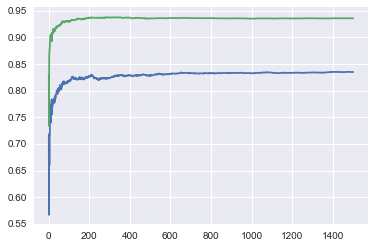

0.9356151527


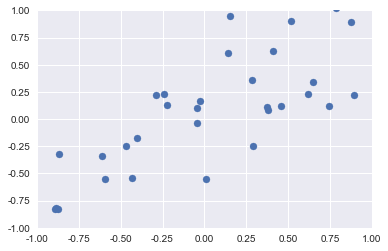

In [34]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(n_estimators=1500,random_state=5,learning_rate=0.1)
print(cross_val_score(abr,X,y,cv=5))
abr.fit(X_train,y_train)
predicts_abr=abr.predict(X_test)
predicts_abrr=abr.predict(X_train)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_abr),mean_absolute_error(y_test,predicts_abr),mean_squared_error(y_test,predicts_abr)))
plt.plot(range(1,1501),[r2_score for r2_score in abr.staged_score(X_test,y_test)])
plt.plot(range(1,1501),[r2_score for r2_score in abr.staged_score(X_train,y_train)])
plt.show()
print(r2_score(y_train,predicts_abrr))
plt.scatter(y_test,predicts_abr)
axis([-1,1,-1,1])

plt.show()

In [35]:
A

,Pore,GR,DEN,AC,CN,Faces_1.0,Faces_2.0,Faces_3.0
382,4.720,124.370,2.670,67.803,14.268,0,1,0
383,5.190,114.920,2.684,82.729,14.303,0,1,0
384,5.300,122.763,2.641,80.535,13.706,0,1,0
385,8.480,118.900,2.660,78.110,14.781,0,1,0
386,5.290,114.805,2.668,76.256,16.228,0,1,0
387,4.290,102.213,2.569,70.435,14.193,0,1,0
388,8.310,102.807,2.605,71.768,14.364,0,1,0
389,10.120,101.743,2.596,71.415,15.048,0,1,0
390,8.180,97.074,2.587,70.845,13.159,0,1,0
391,5.240,93.526,2.637,70.276,11.793,0,1,0


In [ ]:
df_log = pd.read_csv('C:/Users/Administrator/Desktop/TZ127curve.csv')
df_log.columns